<a href="https://colab.research.google.com/github/Samuel-Mbah/Perceptron/blob/main/Training_Perceptron_with_the_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing  MNIST dataset from the keras module

'''The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems.
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students.
Each image is stored in a 28 x 28 matrix, where each cell contains an integer between 0 and 255.
The output vector is a 10-dimensional vector, where the ith element is 1 if the image is of the digit i, and 0 otherwise.'''


from keras.datasets import mnist

In [ ]:
# Loading the dataset in variables
# The dataset is already split into training and testing sets
# The images are stored in numpy arrays
# The labels are stored in numpy arrays
# It can also be (train_X, train_y), (test_X, test_y) = mnist.load data()

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
# Printing the shape of the training data and testing data
# This is done to find out the number of training examples and testing examples or split ratio
# And to find out the dhape of the images (Dimensions)

print(f'train_images: {train_images.shape}')

print(f'train_labels: {train_labels.shape}')

print(f'test_images: {test_images.shape}')

print(f'test_labels: {test_labels.shape}')

train_images: (60000, 28, 28)
train_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


In [ ]:
# We can infer that the training set has 60000 examples and the testing set has 10000 examples
# Each individual image (input vector) is a 28 x 28 matrix
# Each individual label (output vector) is a 1-dimensional vector with 10 elements

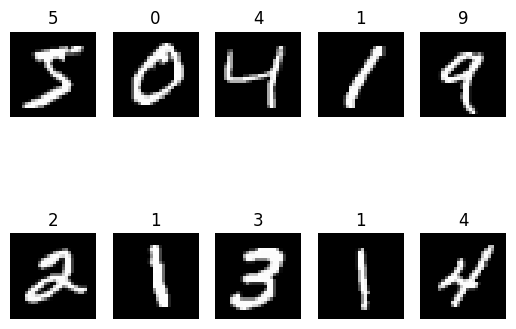

In [ ]:
# Displaying the images and labels of the first 10 training examples

import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()


In [ ]:
# since I need to compare the input to the output, I need to extract all the zeros and ones from the the labels in the dataset.
# I will be using the numpy.where() function to extract the zeros and ones from the dataset
# This returns an output depending on the condition
# Here the condition is that the label should be either 0 or 1

import numpy as np
import time

zero_indices = np.where(train_labels == 0)[0] # Extracting the indices of the zeros
one_indices = np.where(train_labels == 1)[0] # Extracting the indices of the ones
neg_one_indices = np.where(train_labels == -1)[0] # Extracting the indices of the ones


In [ ]:
# Now i can join the indices of the zeros and ones into a single array along the same axis
# This is done using the numpy.concatenate() function

new_image_subset = np.concatenate((train_images[zero_indices], train_images[one_indices]), axis = 0) # This will return a new array containing only the elements in train_images that are equal to indices 0 and 1 but vertically stacked (axis = 0)

new_label_subset = np.concatenate((train_labels[zero_indices], train_labels[one_indices]), axis = 0) # This will return a new array containing only the elements in train_labels that are equal to 0 and 1 but vertically stacked (axis = 0)

neg_image_subset = np.concatenate((train_images[neg_one_indices], train_images[one_indices]), axis = 0)

neg_labels_subset = np.concatenate((train_labels[neg_one_indices], train_labels[one_indices]), axis = 0)


In [ ]:
# Now I need to Normalize the images and reshape them into 1-dimensional arrays
# This is done using the numpy.reshape() function
# The reshape function is used to convert the 28 x 28 matrix into a 1-dimensional array (flatten the matrix)


new_image_subset = new_image_subset.reshape(new_image_subset.shape[0], -1) / 255.0 # This will return a new array containing the elements in new_image_subset but reshaped into 1-dimensional arrays and normalized
# The -1 in the reshape function means that the number of columns will be calculated automatically based on the number of rows and the number of elements in the array
# The 255.0 is used to normalize the images by scaling down each pixel value to a value between 0 and 1

neg_image_subset = neg_image_subset.reshape(neg_image_subset.shape[0], -1) / 255.0

#new_image_subset.shape

neg_image_subset.shape

(6742, 784)

In [ ]:
# I can now split the dataset into input features and target labels
# This is done using the numpy.split() function

input_x = new_image_subset

target_y = new_label_subset

input_x1 = neg_image_subset

target_y1 = neg_labels_subset


In [ ]:
# Since I have my input data and target values now i can train my perceptron by implementing the gradient descent algorithm.
# My activation function will be th heaviside step function
# The heaviside step function is a function that returns 0 if the input is less than 0 and 1 if the input is greater than 0

# GDA utilises the MSE cost function
# The MSE cost function is the mean of the squared differences between the target values and the predicted values
# The MSE cost function is used to calculate the error of the model
# The error is used to update the weights of the model
# The weights are updated using the gradient descent algorithm
# The gradient descent algorithm is used to find the minimum of the cost function
# The gradient descent algorithm is used to find the optimal weights of the model
# The optimal weights of the model are used to make predictions
# The predictions are compared to the target values to calculate the error

# The gradient descent algorithm is implemented as follows:



1. # Define the mean squared error cost function

# Import numpy module

import numpy as np

def cost_function(prediction, target, derivative = False):
    if derivative == True:
        return -2 * (target - prediction)
    return np.mean((target-prediction) **2)
# The cost function takes in 3 arguments
# if true return the derivative of the cost function else return the cost function


In [ ]:
# 2. Define the heaviside step function

def heaviside_step_function(x, theta=0, derivative = False):
    if derivative == True:
        return np.ones_like(x) # returns an array of ones with the same shape and type as x
    return np.where(x >= theta, 1, 0)

In [ ]:
# OTHER ACTIVATION FUNCTIONS

def sigmoid(x, derivative=False):
    if derivative:
        return sigmoid(x) * (1 - sigmoid(x))
    return 1 / (1 + np.exp(-x))

def tanh(x, derivative=False):
    if derivative:
        return 1 - np.square(tanh(x))
    return np.tanh(x)

def relu(x, derivative=False):
    if derivative:
        return np.where(x >= 0, 1, 0)
    return np.maximum(x, 0)

In [ ]:
#3. Define the perceptron class

class Perceptron():
    def __init__(self, input_size, **kwargs):
        self.weight_init          = kwargs.get('weight_init', 0)
        self.weights              = np.ones((input_size, )) * self.weight_init
        self.bias                 = kwargs.get('bias', 0)
        self.activation_function  = kwargs.get('activation_fn', heaviside_step_function)
        self.threshold            = kwargs.get('threshold', 0)
        self.loss_function        = kwargs.get('loss_fn', cost_function)


    # Define the forward pass algorithm
    # This function is used to make predictions
    def forward_pass(self, input_v):
        # Reshaping (tranpose) the input vector into a 1-dimensional array
        #input_v = input_v.reshape(-1, 1)

        # Calculating the pre-activation value ( y hat = w * x + b)
        #pre_activation = np.dot(self.weights, input_v.T) + self.bias
        pre_activation = self.weights @ input_v.T + self.bias

        if self.activation_function == heaviside_step_function:
            output_v = self.activation_function(pre_activation, theta = self.threshold)
        else:
            output_v = self.activation_function(pre_activation)
        return output_v

    # Define the backward pass algorithm
    # This function is used to update the weights of the model

    def backward_pass(self, inputs, targets, learning_rate, epochs):
        self.loss_history = [] # This list will be used to store the loss values for each epoch

        self.weights_history = [[] for n in range(self.weights.shape[0])]  # This list will be used to store the weights for each epoch

        self.bias_history = [] # This list will be used to store the bias for each epoch

        for epoch in range(epochs):
             # Let the initial error be equal to 0
            error = 0

            # Loop through each input value in the dataset
            for i in range(len(inputs)):
                # Make a prediction
                prediction = self.forward_pass(inputs[i])

                # Calculate the error
                error += self.loss_function(target=targets[i], prediction=prediction)

                # Calculate the derivative (gradient) of the loss function
                loss_derivative = self.loss_function(target=targets[i], prediction=prediction, derivative = True)

                # Calculate the derivate (gradient) of the activation function
                activation_derivative = self.activation_function(prediction, derivative = True)

                # Update the weights
                self.weights -= learning_rate * loss_derivative * activation_derivative * inputs[i]

                # Update the bias
                self.bias -= learning_rate * loss_derivative * activation_derivative


            #Append the weights to the weights_history list
            for i in range(self.weights.shape[0]):
                self.weights_history[i].append(self.weights[i])

            # Append the bias to the bias_history list
            self.bias_history.append(self.bias)

            #Calculate the average error by dividing by the number of inputs
            error /= len(inputs)

            #print("Epoch: {},  Bias: {}".format(epoch, error, self.bias))
            #print("Weights,{}".format(self.weights))

            # Append the error to the loss list
            self.loss_history.append(error)


In [ ]:
#input_x.shape

input_x1.shape

(6742, 784)

In [ ]:
#target = target_y # output or target values (labels) or y


# specify the number of epochs
epochs = 100

# specify the learning_rate
learning_rate = 0.001

In [ ]:

# Include the input data and target values in the perceptron class for the heaviside_step_function
perceptron_hv = Perceptron(input_size = input_x.shape[1], activation_fn = heaviside_step_function, loss_fn = cost_function)
pretrain_weights = perceptron_hv.weights.copy()
# Print the outputs before training (forward_pass)
print(f"For initialized Perceptron, outputs before training are: {perceptron_hv.forward_pass(input_x)}")

# Train the perceptron (Backward_pass)
perceptron_hv.backward_pass(input_x, target_y, learning_rate, epochs = epochs)

# Print the outputs after training (forward_pass)
print(f"Perceptron trained for {epochs} epochs, outputs are: {perceptron_hv.forward_pass(input_x)}\n")
posttrain_weights = perceptron_hv.weights.copy()

For initialized Perceptron, outputs before training are: [1 1 1 ... 1 1 1]
Perceptron trained for 5 epochs, outputs are: [1 1 1 ... 1 1 1]



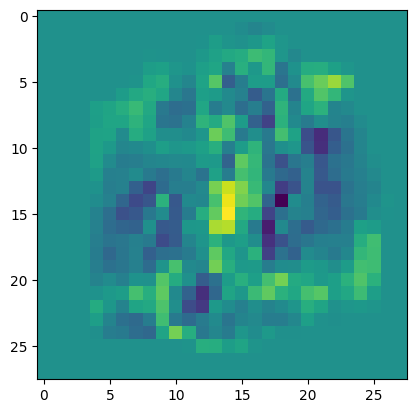

In [ ]:
weight_change = posttrain_weights - pretrain_weights
plt.imshow(weight_change.reshape(28,28))

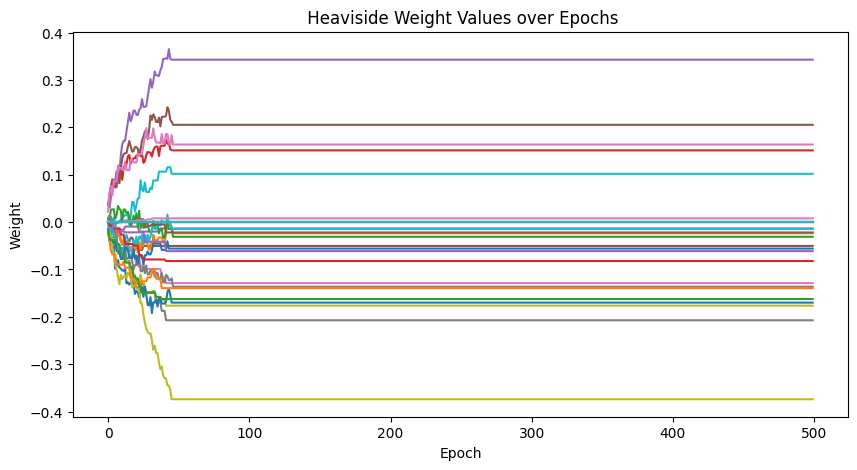

In [ ]:
# F
import matplotlib.pyplot as plt

# Plot the loss curve
#plt.figure(figsize=(10,5))
#plt.plot(perceptron_hv.loss_history)
#plt.xlabel("Epoch")
#plt.ylabel("Loss")
#plt.title(" Heaviside Training Loss Curve")
#plt.show()

# Plot the weights curve

plt.figure(figsize=(10,5))
for i in range(392,392+30):
    plt.plot(perceptron_hv.weights_history[i], label="Weight {}".format(i+1))
    #plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Weight")
plt.title(" Heaviside Weight Values over Epochs")
plt.show()

In [ ]:
perceptron_hv.weights_history[0]

[]

In [ ]:
# Sigmoid function
perceptron_sg = Perceptron(input_size = input_x.shape[1], activation_fn = sigmoid, loss_fn = cost_function)

# Print the outputs before training (forward_pass)
print(f"For initialized Perceptron, outputs before training are: {perceptron_sg.forward_pass(input_x)}")

# Train the perceptron (Backward_pass)
perceptron_sg.backward_pass(input_x, target, learning_rate, epochs = epochs)

# Print the outputs after training (forward_pass)
print(f"Perceptron trained for {epochs} epohs, outputs are: {perceptron_sg.forward_pass(input_x)}\n")
print(input_x.shape)


For initialized Perceptron, outputs before training are: [0.5 0.5 0.5 ... 0.5 0.5 0.5]
Perceptron trained for 5 epohs, outputs are: [0.95621342 0.95623022 0.95652409 ... 0.95732945 0.95721447 0.95724871]

(12665, 784)


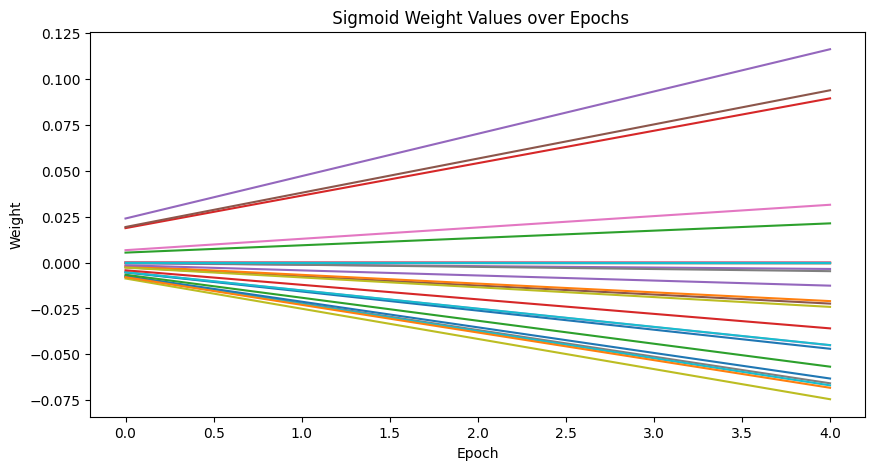

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curve
#plt.figure(figsize=(10,5))
#plt.plot(perceptron_sg.loss_history)
#plt.xlabel("Epoch")
#plt.ylabel("Loss")
#plt.title(" Sigmoid Training Loss Curve")
#plt.show()

# Plot the weights curve
plt.figure(figsize=(10,5))
for i in range(392,392+30):
    plt.plot(perceptron_sg.weights_history[i], label="Weight {}".format(i+1))
    #plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Weight")
plt.title(" Sigmoid Weight Values over Epochs")
plt.show()

In [ ]:
# hyperbolic tangent
perceptron_tn = Perceptron(input_size = input_x1.shape[1], activation_fn = tanh, loss_fn = cost_function)

# Print the outputs before training (forward_pass)
print(f"For initialized Perceptron, outputs before training are: {perceptron_tn.forward_pass(input_x1)}")

# Train the perceptron (Backward_pass)
perceptron_tn.backward_pass(input_x1, target_y1, learning_rate, epochs = epochs)

# Print the outputs after training (forward_pass)
print(f"Perceptron trained for {epochs} epochs, outputs are: {perceptron_tn.forward_pass(input_x1)}")


For initialized Perceptron, outputs before training are: [0. 0. 0. ... 0. 0. 0.]
Perceptron trained for 100 epochs, outputs are: [0.99912271 0.99912271 0.99912271 ... 0.99912271 0.99912271 0.99912271]


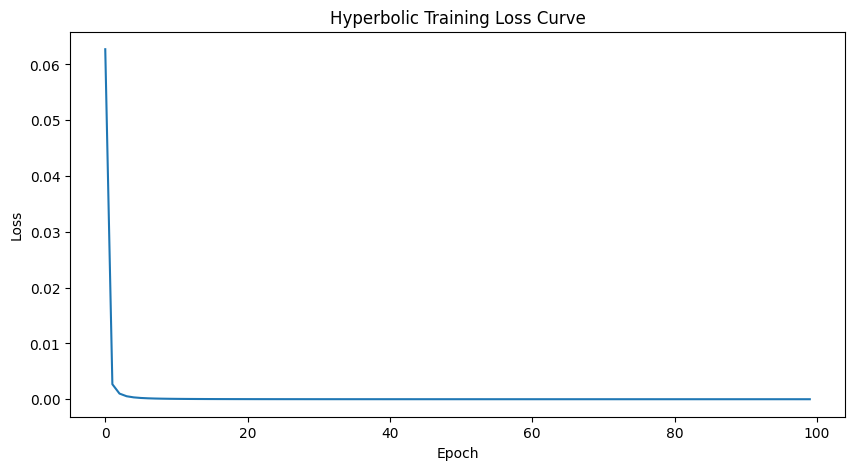

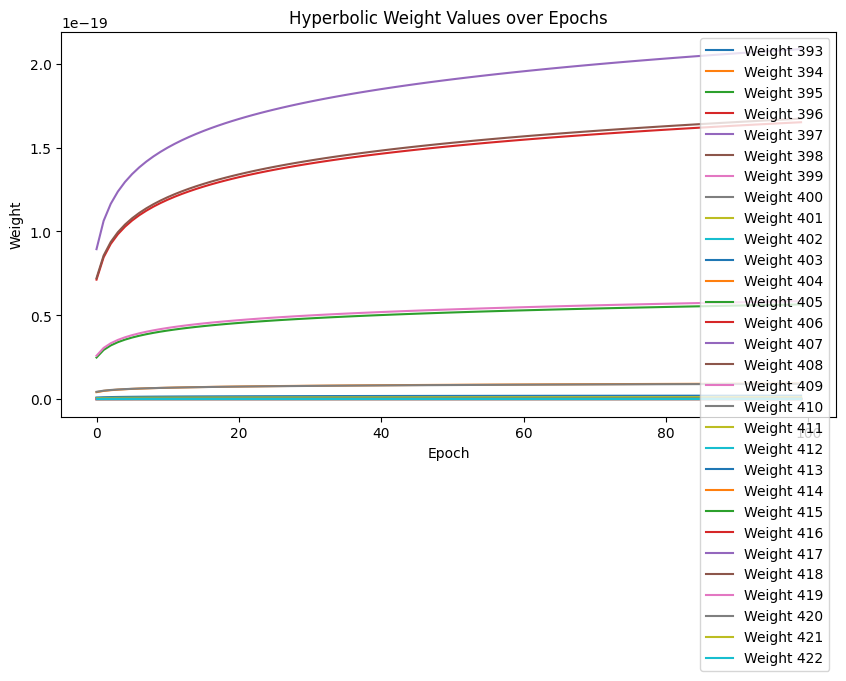

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.figure(figsize=(10,5))
plt.plot(perceptron_tn.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Hyperbolic Training Loss Curve")
plt.show()

# Plot the weights curve
plt.figure(figsize=(10,5))

for i in range(392,392+30):
    plt.plot(perceptron_tn.weights_history[i], label="Weight {}".format(i+1))
    plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Weight")
plt.title("Hyperbolic Weight Values over Epochs")
plt.show()

In [ ]:
# Rectified Linear Unit
perceptron_relu = Perceptron(input_size = input_x.shape[1], activation_fn = relu, loss_fn = cost_function)

# Print the outputs before training (forward_pass)
print(f"For initialized Perceptron, outputs before training are: {perceptron_relu.forward_pass(input_x)}")

# Train the perceptron (Backward_pass)
perceptron_relu.backward_pass(input_x, target, learning_rate, epochs = epochs)

# Print the outputs after training (forward_pass)
print(f"Perceptron trained for {epochs} epochs, outputs are: {perceptron_relu.forward_pass(input_x)}\n")


For initialized Perceptron, outputs before training are: [0. 0. 0. ... 0. 0. 0.]
Perceptron trained for 500 epochs, outputs are: [0.03608265 0.03510557 0.31320308 ... 1.00611974 0.99690767 1.00237819]



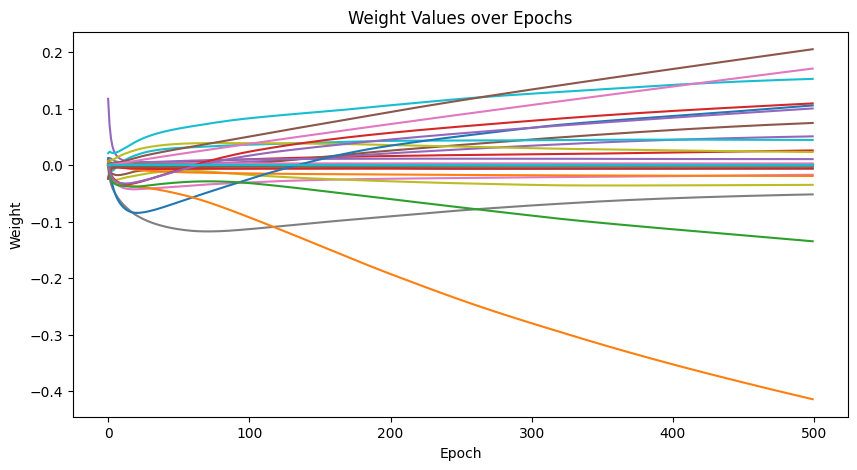

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curve
#plt.figure(figsize=(10,5))
#plt.plot(perceptron_relu.loss_history)
#plt.xlabel("Epoch")
#plt.ylabel("Loss")
#plt.title(" ReLU Training Loss Curve")
#plt.show()

# Plot the weights curve
plt.figure(figsize=(10,5))
for i in range(392,392+30):
    plt.plot(perceptron_relu.weights_history[i], label="Weight {}".format(i+1))
    #plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Weight")
plt.title("Weight Values over Epochs")
plt.show()

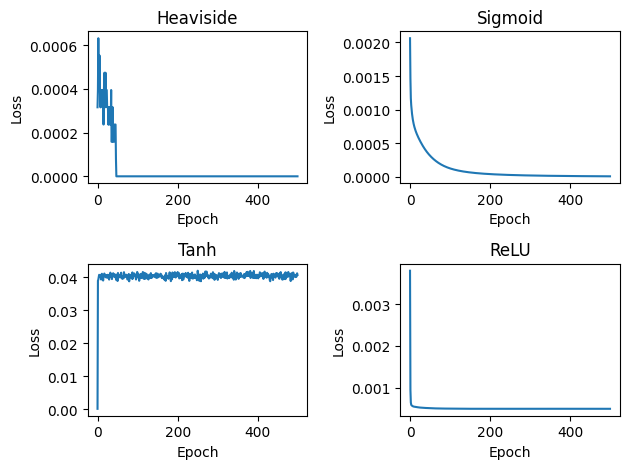

In [ ]:
fig, ax = plt.subplots(2, 2)

ax[0][0].plot(perceptron_hv.loss_history)
ax[0][0].set_xlabel('Epoch')
ax[0][0].set_ylabel('Loss')
ax[0][0].set_title('Heaviside')

ax[0][1].plot(perceptron_sg.loss_history)
ax[0][1].set_xlabel('Epoch')
ax[0][1].set_ylabel('Loss')
ax[0][1].set_title('Sigmoid')

ax[1][0].plot(perceptron_tn.loss_history)
ax[1][0].set_xlabel('Epoch')
ax[1][0].set_ylabel('Loss')
ax[1][0].set_title('Tanh')

ax[1][1].plot(perceptron_relu.loss_history)
ax[1][1].set_xlabel('Epoch')
ax[1][1].set_ylabel('Loss')
ax[1][1].set_title('ReLU')

plt.tight_layout()
plt.show()


In [ ]:
SPEED OF THE LEARNING RATES

In [ ]:
target = target_y # output or target values (labels) or y

# Iterate over a list of learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 1000]
time_list = []

for i in learning_rates:

        start = time.time()
        perceptron_hv.backward_pass(input_x.reshape[], target, learning_rate = learning_rates, epochs=epochs)
        end = time.time()
        time_taken = end - start

        time_list.append(time_taken)

# plot a graph to show learning rate and time taken

plt.plot(learning_rates, time_list)
plt.xlabel('Learning Rate')
plt.ylabel('Time Taken (s)')

# show the x labels as a log scale

plt.xscale('log')

plt.title('Learning Rate vs Time Taken')
plt.show()